#Importing Required Libraries

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



#Setting Path for the input image

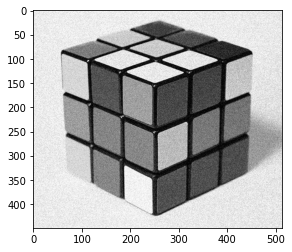

(449, 513)

In [10]:
path = "../img/rubiks_cube.png"
img= cv2.imread(path,cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
img.shape

#Kernel Size input

In [11]:
kernel_size = int(input("Enter kernel Size: "))
kernel_size = kernel_size//2
sigma = 0.3*((kernel_size-1)*0.5-1)+0.8
sigma = sigma*3 

#Modified the input image with border

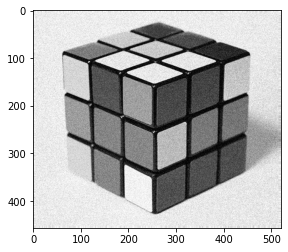

(457, 521)

In [12]:
output = np.zeros((img.shape[0], img.shape[1]), np.float32)
mimg = cv2.copyMakeBorder(img, kernel_size,kernel_size,kernel_size,kernel_size, cv2.BORDER_REPLICATE)
plt.imshow(cv2.cvtColor(mimg, cv2.COLOR_BGR2RGB))
plt.show()
mimg.shape

#Gaussian Filter

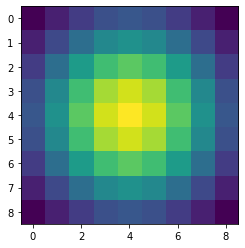

In [13]:
gf = np.zeros((2*kernel_size+1, 2*kernel_size+1), dtype="float32")

for i in range(-kernel_size, kernel_size+1):
    for j in range (-kernel_size, kernel_size+1):
        gf[i+kernel_size][j+kernel_size]=np.exp(-(pow(i,2)+pow(j,2))/(2*pow(sigma,2)))
range_filter = np.zeros((gf.shape[0],gf.shape[1]), np.float32)
plt.imshow(gf)


#Generating Range Filter and Convolution

In [14]:
for i in range (kernel_size, mimg.shape[0]-kernel_size):
    for j in range(kernel_size, mimg.shape[1]-kernel_size):
        sum = 0
        mid = int(mimg[i][j])
        for p in range(-kernel_size, kernel_size+1):
            for q in range(-kernel_size, kernel_size+1):
                distance = int(mimg[p+i][q+j])-mid
                range_filter[p-kernel_size][q-kernel_size]=np.exp(-distance**2/(sigma**2))/(sigma**2)
        filter = np.multiply(gf, range_filter)
        norm = np.sum(filter)
        for p in range(-kernel_size, kernel_size+1):
            for q in range(-kernel_size, kernel_size+1):
                sum+=mimg[i-(p+kernel_size)][j-(q+kernel_size)]*filter[p+kernel_size][q+kernel_size]
        output[i-kernel_size][j-kernel_size] = sum/norm


#Built in bilateral Filter in opencv

In [15]:
bilFilter = cv2.bilateralFilter(img, kernel_size*2+1, sigma, sigma)

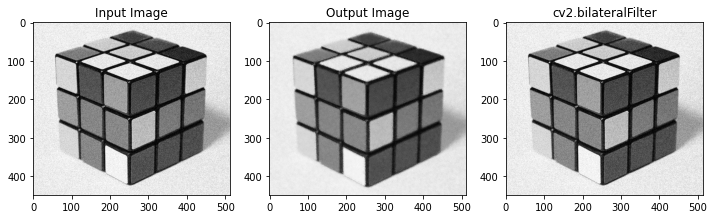

In [16]:
figure , (axis_1, axis_2,axis_3) = plt.subplots(1,3, figsize=(12,12))
axis_1.imshow(img, "gray")
axis_1.set_title("Input Image")
axis_2.imshow(output, "gray")
axis_2.set_title("Output Image")
axis_3.set_title("cv2.bilateralFilter")
axis_3.imshow(bilFilter, "gray")